# Пример 2.2.1

In [1]:
#построим диаграмму рассеяним output vs capital с ‘подогнанной’ прямой
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# stats models: regression fitting
import statsmodels.formula.api as smf
# data visualization
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/Labour.csv')
df

,capital,labour,output,wage
0,2.606563,184,9.250759,43.080307
1,1.323237,91,3.664310,27.780016
2,22.093692,426,28.781516,44.467748
3,10.737851,72,4.124642,39.734710
4,1.161365,46,2.890150,34.650709
...,...,...,...,...
564,2.625403,20,1.424376,33.477545
565,1.276386,61,2.109048,26.300732
566,1.953869,117,6.241870,41.153979
567,1.318527,46,7.902237,66.720139


<AxesSubplot:xlabel='capital', ylabel='output'>

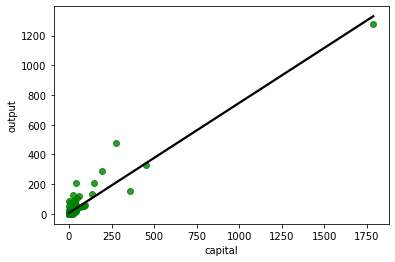

In [3]:
sns.regplot(data=df, x='capital', y='output', ci=None, color = 'green', line_kws={"color": "black"})

In [4]:
# найдем параметры оптимальной прямой output на capital
# подгонка прямой
fitted_line = smf.ols(formula='output~capital', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

Intercept    6.19
capital      0.74
dtype: float64

# Спецификация
$$ output=6.19+0.74*capital$$

In [5]:
# найдем параметры оптимальной прямой output на capital без константы
fitted_line = smf.ols(formula='output~-1+capital', data=df).fit()
fitted_line.params.round(2)

capital    0.75
dtype: float64

# Спецификация
$$ output=0.75*capital$$

Intercept          1.19
np.log(capital)    0.56
dtype: float64

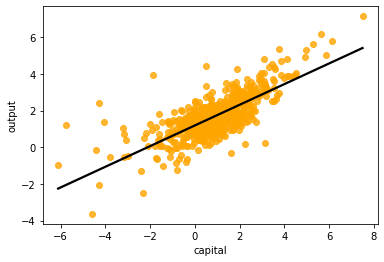

In [7]:
# построим диаграмму рассеяним log(output) vs log(capital) с ‘подогнанной’ прямой
sns.regplot(x=np.log(df['capital']), y=np.log(df['output']), ci=None, color = 'orange', line_kws={"color": "black"})

# найдем параметры оптимальной прямой log(output) на log(capital)
# подгонка прямой
fitted_line = smf.ols(formula='np.log(output)~np.log(capital)', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

# Спецификация
$$ log(output)=1.19+0.56*log(capital)$$

In [9]:
# найдем параметры оптимальной прямой log(output) на log(capital) без константы
fitted_line = smf.ols(formula='np.log(output)~-1+np.log(capital)', data=df).fit()
fitted_line.params.round(2)

np.log(capital)    0.88
dtype: float64

# Спецификация
$$ log(output)=0.88*log(capital)$$

# Пример 2.2.2

Intercept   -4.72
labour       0.10
dtype: float64

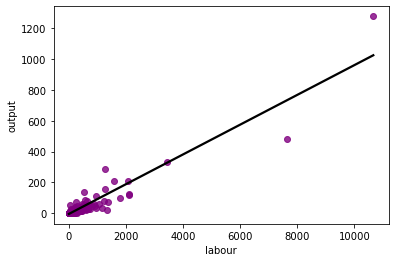

In [10]:
# построим диаграмму рассеяним output vs labour с ‘подогнанной’ прямой
sns.regplot(data=df, x='labour', y='output', ci=None, color = 'purple', line_kws={"color": "black"})
# найдем параметры оптимальной прямой output на labour
# подгонка прямой
fitted_line = smf.ols(formula='output~labour', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

# Спецификация
$$ output=-4.72+0.10*labour$$

In [11]:
# параметры оптимальной прямой output на labour без константы
fitted_line = smf.ols(formula='output~-1+labour', data=df).fit()
fitted_line.params.round(2)

labour    0.09
dtype: float64

# Спецификация
$$ output=0.09*labour$$

Intercept        -2.38
np.log(labour)    0.90
dtype: float64

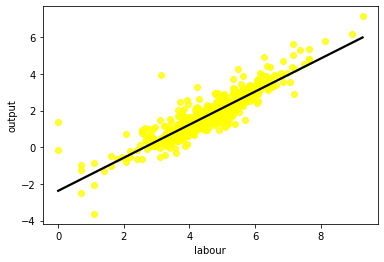

In [12]:
# построим диаграмму рассеяним log(output) vs log(labour) с ‘подогнанной’ прямой
sns.regplot(x=np.log(df['labour']), y=np.log(df['output']), ci=None, color='yellow', line_kws={"color": "black"})
# найдем параметры оптимальной прямой log(output) на log(labour)
# подгонка прямой
fitted_line = smf.ols(formula='np.log(output)~np.log(labour)', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

# Спецификация
$$ log(output)=-2.38+0.90*log(labour)$$

In [14]:
# параметры оптимальной прямой log(output) на log(labour) без константы
fitted_line = smf.ols(formula='np.log(output)~-1+np.log(labour)', data=df).fit()
fitted_line.params.round(2)

np.log(labour)    0.41
dtype: float64

# Спецификация
$$ log(output)=0.41*log(labour)$$

# Пример 2.2.3

Intercept                  1.09
np.log(capital)            0.50
I(np.log(capital) ** 2)    0.05
dtype: float64

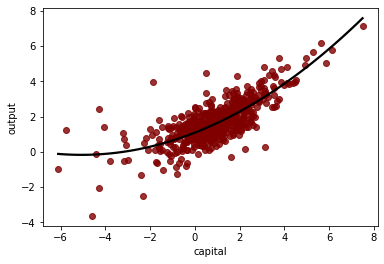

In [20]:
# построим диаграмму рассеяним log(output) vs log(capital) с ‘подогнанной’ параболой
sns.regplot(x=np.log(df['capital']), y=np.log(df['output']), ci=None, order=2, color ='maroon', line_kws={"color": "black"})

# найдем параметры оптимальной параболы log(output) vs log(capital), log2(capital)
# подгонка прямой
fitted_polynom = smf.ols(formula='np.log(output)~np.log(capital)+I(np.log(capital)**2)', data=df).fit()
# коэффициенты с округлением
fitted_polynom.params.round(2)

# Спецификация
$$ log(output)=1.09+0.50*log(capital)+0.05*log^2(capital) $$

# Пример 2.2.4

Intercept                -1.28
np.log(labour)            0.37
I(np.log(labour) ** 2)    0.06
dtype: float64

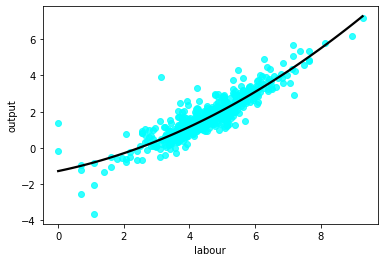

In [25]:
#построим диаграмму рассеяним log(output) vs log(labour) с ‘подогнанной’ параболой
sns.regplot(x=np.log(df['labour']), y=np.log(df['output']), order = 2, ci=None, color = 'cyan', line_kws={"color": "black"}) 

#найдем параметры оптимальной параболы log(output) vs log(labour), log2(labour)
# подгонка прямой
fitted_polynom = smf.ols(formula='np.log(output)~np.log(labour)+I(np.log(labour)**2)', data=df).fit()
# коэффициенты с округлением
fitted_polynom.params.round(2)

# Спецификация
$$ log(output)=-1.28+0.37*log(labour)+0.06*log^2(labour) $$